# Mineral Potential Mapping - A Practical Tool

Here, in this notebook, a simple but practical tool has been developed which helps with geochemical modelling. The core of all of processes is based on an article by [Mahyar Yousefi and Emmanuel Carranza](https://doi.org/10.1016/J.CAGEO.2015.03.007). According to the article, assignment of weights to different classes of evidence in an evidential map is usually done through expert opinion with some trial-and-error. In order to do this process in a data-driven way rather than using expert opinion, a new method using prediction-area (P-A) plots and normalized density is introduced to determine weights of every single evidential map.   
In the following parts the literature disccused in the aforementioned work is programmed in Python. Using Python helps with understanding mechanics of the research and also enables future researchers to tweak different parts of the code to ultimately optimize processes.

## Part 1

<p style="color:red">SOME INFORMATION SHOULD BE ADDED HERE</p>

### 1. Libraries

This research relies on some of the most efficient and at the same time, ubiquitous Python libraries. Using these libraries not only makes life much easier, but also they help with fast execusion of the code since they're optimized. The main libraries being utilized in here are [Pandas](https://pandas.pydata.org/), [NumPy](https://numpy.org/), [SciPy](https://www.scipy.org/), and [Matplotlib](https://matplotlib.org/). There are also a few less common libraries which can be seen in the next code block.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from scipy.interpolate import griddata
from scipy.stats import describe, probplot, stats
from scipy import interpolate
from math import *

### 2. The Data

The data that is used in this research is gathered from Chahar Gonbad in Kerman in Iran. **_(more info should be added)_**

In the following code block, the data, which is a csv file, is imported into a Pandas DataFrame. This helps with handling the data in the most flexible way possible and makes data processing much easier than any other data handling method. After importing the data, the first few lines of the main csv file is shown to the user so they can see the nature of the file.

In [2]:
file_type = input(" What's the file type? csv or xls/xlsx? ")
file_location = input("\n Where's the file? give me the file path. ")

# Example file path:
# /Users/yasin/Desktop/Thesis - Programming/Data.xls

if file_type == 'xlsx' or 'xls' or '.xlsx' or '.xls':
    raw_data = pd.read_excel(file_location, sheet_name="Sheet1", parse_dates=[0])
elif file_type == 'csv' or '.csv':
    raw_data = pd.read_csv(file_location)
    

raw_data = raw_data.replace("",np.nan)
raw_data = raw_data.dropna()
raw_data = raw_data.drop_duplicates().loc[:, 'X':]

print(raw_data.head(10))

 What's the file type? csv or xls/xlsx? csv

 Where's the file? give me the file path. /Users/yasin/Desktop/Thesis - Programming/Data.xls
           X           Y   Zn  Pb    Ag  Cu  Mo   Cr  Ni  Co   Ba
0  431434.79  3305001.94   87   7  0.02  42   2   57  38  14  393
1  432522.60  3298058.43   70   6  0.02  56   2   27  29  20  404
2  438045.35  3291987.05   75   5  0.02  69   2   44  23  17  417
3  436260.76  3294412.90   70   6  0.02  54   1   20  19  12  377
4  439294.48  3297653.81  168  14  0.02  27   2   31  18  14  277
5  441406.54  3298650.88   87  11  0.02  37   2   25  28  14  797
6  431189.97  3315353.72  113  11  0.02  40   1  110  36  13  361
7  428527.24  3315392.79  133   9  0.02  45   2   73  42  16  414
8  430881.58  3316951.45  144   8  0.02  58   1   83  39  21  617
9  427968.68  3317058.60  267  11  0.02  37   1  285  43  17  292


### 3. Basic Statistical Examination

First and foremost, the data should be statistically examined so the user can have a grast on the data structure. In the next parts some tools for basic statistics like arithmatic mean and variance, Pearson and Spearman correlation coefficents, and statistical plots like histogram, have been developed.

#### Basic Statistics
In the next code block, a function has been developed which returns number of observations, minimum and maximum of the data for each column, arithmatic mean, variance, skewness, and kurtosis. All of these calculations, then, are stored in a list for use in further processes.

In [3]:
def basic_stats(raw_data, element_concentration):

    selected_values = describe(raw_data.loc[:,f'{element_concentration}'].values)

    s1 = str(selected_values.nobs)
    s2 = str(selected_values.minmax[0])
    s3 = str(selected_values.minmax[1])
    s4 = str(round(selected_values.mean, 2))
    s5 = str(round(selected_values.variance, 2))
    s6 = str(round(selected_values.skewness, 2))
    s7 = str(round(selected_values.kurtosis, 2))

    return [s1,s2,s3,s4,s5,s6,s7]


We need to iterate this function for our desired columns, which in this case is all of the 9 columns containing element concentration. The next block iterates this process for all of the given elements and store them in a Pandas DataFrame.

In [4]:
def basic_stats_df(raw_data, element_concentration):

    columns = ['No. of Observations', 'Min', 'Max', 'Mean', 'Variance', 'Skewness', 'Kurtosis']
    index_names = element_concentration.split()
    df = pd.DataFrame(columns=columns)


    data = []
    selected_columns = raw_data.loc[:, index_names].columns
    for counter, column in enumerate(selected_columns):
        values = basic_stats(raw_data,element_concentration=column)
        zipped = zip(columns, values)
        data.append(dict(zipped))
        

    df = df.append(data,True)

    index = pd.Index(index_names)
    df = df.set_index(index)

    print(df)

Now, that all is set, let's call in the above function to get our hands on basic statistics.

In [5]:
input_elements = input("\n For what columns should the geochemical processes be done? "
               "\n Please use 'space' as a separator. \n")

# Zn Pb Ag Cu Mo Cr Ni Co Ba

basic_stats_df(raw_data,input_elements)


 For what columns should the geochemical processes be done? 
 Please use 'space' as a separator. 
Zn Pb Ag Cu Mo Cr Ni Co Ba
   No. of Observations   Min   Max    Mean  Variance Skewness Kurtosis
Zn                 846     2   752  113.81   6459.84     2.57    11.51
Pb                 846     2   321   23.82    639.82     6.11    56.93
Ag                 846  0.02   1.0    0.03      0.01    11.75   136.01
Cu                 846     2  1200   65.07   2856.14    13.27   255.58
Mo                 846     1    12    1.73      1.07     4.13    29.63
Cr                 846     7  1200  120.74  13063.54     3.41    18.32
Ni                 846     2  1200   68.02   3993.93     7.91   123.54
Co                 846     2   247   28.66    249.24     4.54    51.95
Ba                 846    15  4650  424.46   50244.0     8.25   148.27


#### Pearson and Spearman Correlation Coefficients
The [Pearson correlation coefficient](https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php) is a measure of the strength of a linear association between two variables. The Pearson correlation coefficient can take a range of values from +1 to -1. A value of 0 indicates that there is no association between the two variables. A value greater than 0 indicates a positive association; that is, as the value of one variable increases, so does the value of the other variable. A value less than 0 indicates a negative association; that is, as the value of one variable increases, the value of the other variable decreases. This is shown in the diagram below:

<img src="https://statistics.laerd.com/statistical-guides/img/pc/pearson-1-small.png" alt="pearson correlation coefficient" href="https://statistics.laerd.com/statistical-guides/pearson-correlation-coefficient-statistical-guide.php" width=500px>

The [Spearman's rank-order correlation](https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide-2.php) is the nonparametric version of the Pearson correlation. Spearman's correlation coefficient, measures the strength and direction of association between two ranked variables. The Spearman correlation coefficient can take values from +1 to -1 as well. A coefficient of +1 indicates a perfect association of ranks, a coefficient of zero indicates no association between ranks, and a coefficeint of -1 indicates a perfect negative association of ranks. The closer this coefficient is to zero, the weaker the association between the ranks.

In the next to code blocks, first a function is developed to calculate these two correlation coefficients, then asks the user to give two of the desired columns to calculate them.

In [6]:
def correlation(first_element, second_element):

    first_elem, second_elem = raw_data.loc[:, f'{first_element}'], raw_data.loc[:, f'{second_element}']
    spearcorr = list(stats.spearmanr(first_elem, second_elem))
    pearcorr = list(stats.pearsonr(first_elem, second_elem))
    
    spearcorr = round(spearcorr[0], 3)
    pearcorr = round(pearcorr[0], 3)

    return pearcorr, spearcorr

In [7]:
def correlation_iterated(raw_data,element_concentration):

    columns = index_names = element_concentration.split()
    
    data1 = {}
    data2 = {}
    selected_columns = raw_data.loc[:,columns].columns   
    for i in selected_columns:
        temp1 = []
        temp2 = []
        for j in selected_columns:
            a, b = correlation(first_element=i,second_element=j)
            temp1.append(a)
            temp2.append(b)

        data1[i] = temp1
        data2[i] = temp2
    
    
    df1 = pd.DataFrame(data1,index_names)
    df2 = pd.DataFrame(data2,index_names)

    
    print('Here is the Pearson correlation coefficient for elements:\n', df1 , '\n')
    print('Here is the Spearman correlation coefficient for elements:\n', df2)

In [8]:
correlation_iterated(raw_data,input_elements)

Here is the Pearson correlation coefficient for elements:
        Zn     Pb     Ag     Cu     Mo     Cr     Ni     Co     Ba
Zn  1.000  0.360  0.371  0.153 -0.136  0.399  0.203  0.218  0.051
Pb  0.360  1.000  0.088  0.147 -0.094  0.167  0.064  0.037  0.191
Ag  0.371  0.088  1.000  0.074 -0.046  0.050  0.045  0.108 -0.005
Cu  0.153  0.147  0.074  1.000  0.061  0.081  0.084  0.248  0.076
Mo -0.136 -0.094 -0.046  0.061  1.000 -0.105  0.021  0.069  0.047
Cr  0.399  0.167  0.050  0.081 -0.105  1.000  0.498  0.394 -0.095
Ni  0.203  0.064  0.045  0.084  0.021  0.498  1.000  0.558 -0.071
Co  0.218  0.037  0.108  0.248  0.069  0.394  0.558  1.000  0.010
Ba  0.051  0.191 -0.005  0.076  0.047 -0.095 -0.071  0.010  1.000 

Here is the Spearman correlation coefficient for elements:
        Zn     Pb     Ag     Cu     Mo     Cr     Ni     Co     Ba
Zn  1.000  0.461  0.128  0.276 -0.165  0.402  0.175  0.166 -0.044
Pb  0.461  1.000  0.112  0.304 -0.191  0.338  0.097 -0.005  0.174
Ag  0.128  0.112  1.0

#### Statistical Plots
The four main statistical plots are histogram, box plot, P-P plot, and Q-Q plot. 

A [histogram](https://statistics.laerd.com/statistical-guides/understanding-histograms.php) is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc.

A [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" alt="a sample boxplot" href="https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51" width=600px>

[P-P](https://towardsdatascience.com/explaining-probability-plots-9e5c5d304703) (probability–probability) plot is a visualization that plots comulative distribution functions of the two distributions (empirical and theoretical) against each other.

Similarly to P-P plots, [Q-Q](https://towardsdatascience.com/explaining-probability-plots-9e5c5d304703) (quantile-quantile) plots allow us to compare distributions by plotting their quantiles against each other.

In the next two code blocks, all of these are calculated each, and the user can ask for calculation and plotting of these plots for their desired column.

In [9]:
def statistical_plots(raw_data,desired_column):

    values = raw_data.loc[:,f'{desired_column}'].values
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[8,8])
    
    
    #plot1 => histogram
    plot1 = axes[0, 0].hist(values, bins=50,color='c', edgecolor='k', alpha=0.65)
    plot1 = axes[0, 0].axvline(values.mean(), color='k', linestyle='--', linewidth=1)
    min_ylim, max_ylim = axes[0, 0].set_ylim() 
    plot1 = axes[0, 0].text(values.mean()*1.4, max_ylim*0.9, 'Mean: {:.2f}'.format(values.mean()))
    plot1 = axes[0, 0].set(title = f'Histogram chart for {desired_column}')
    
    #plot2 => boxplot
    plot2 = axes[0, 1].boxplot(values, vert=False, patch_artist=False,sym='', showmeans=True)
    plot2 = axes[0, 1].set(title = f'Box plot for {desired_column}')
    plot2 = axes[0, 1].grid(axis = 'x')
    
    #plot3 => Q-Q plot
    plot3 = probplot(values, plot=axes[1, 0])
    plot3 = axes[1, 0].set(title = f'Q-Q plot of {desired_column}')
    plot3 = axes[1, 0].grid(True)
    
    #plot4 => P-P plot
    norm = np.random.normal(0, 1, len(values))
    norm = norm - (min(norm) - min(values))
    min_value = min(norm)
    scale = (max(values) - min_value) / (max(norm) - min_value)
    norm = np.apply_along_axis(lambda x : min_value + (x-min_value)*scale, axis=0, arr=norm)
    norm.sort()
    values.sort()
    bins = np.percentile(norm, np.linspace(0, 100, 1000))
    data_hist, _ = np.histogram(values, bins=bins)
    cumsum_data = np.cumsum(data_hist)
    cumsum_data = np.array(cumsum_data) / max(cumsum_data)
    norm_hist, _ = np.histogram(norm, bins=bins)
    cumsum_norm = np.cumsum(norm_hist)
    cumsum_norm = np.array(cumsum_norm) / max(cumsum_norm)
    
    plot4 = axes[1, 1].plot(cumsum_norm, cumsum_data, 'o')
    plot4 = axes[1, 1].plot([0, 1], [0, 1], color='r')
    plot4 = axes[1, 1].set(title = f'P-P plot of {desired_column}')
    plot4 = axes[1, 1].grid(True)
    
    
    
    plt.suptitle(f'Basic Statistical Plots of {desired_column}')
    fig.tight_layout()
#    plt.savefig("Basic Statistical Plots of {}".format(desired_column), format='raw', dpi=75, bbox_inches='tight')
    plt.show()
    

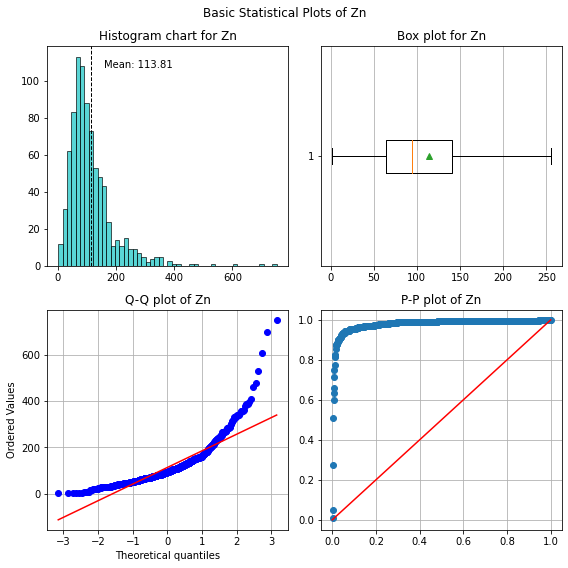

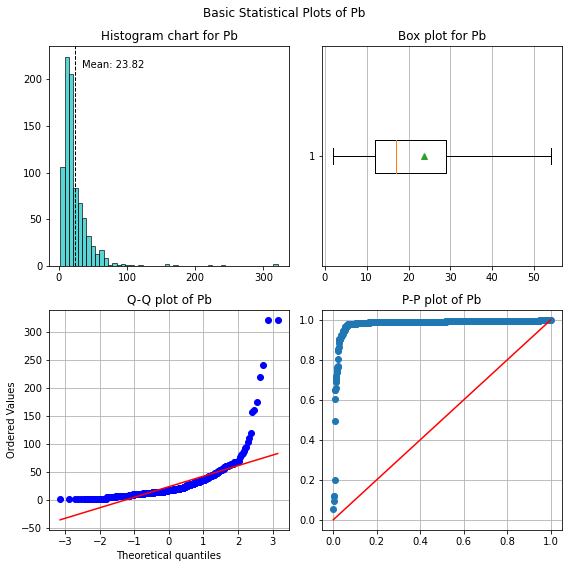

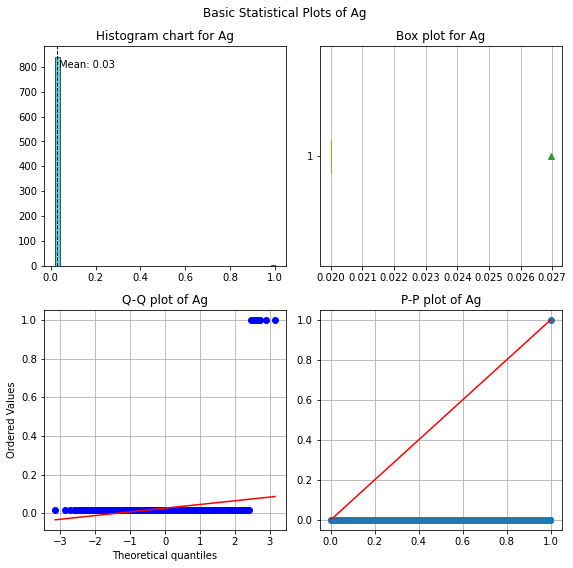

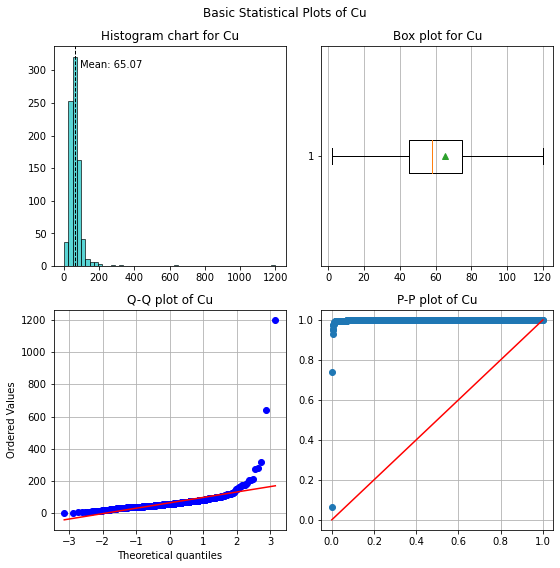

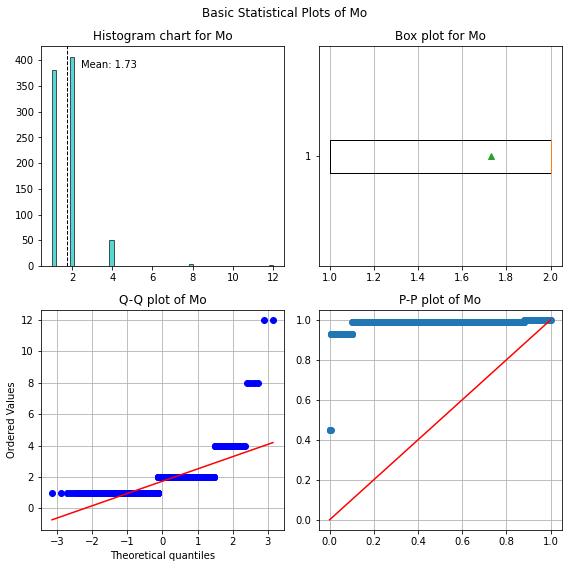

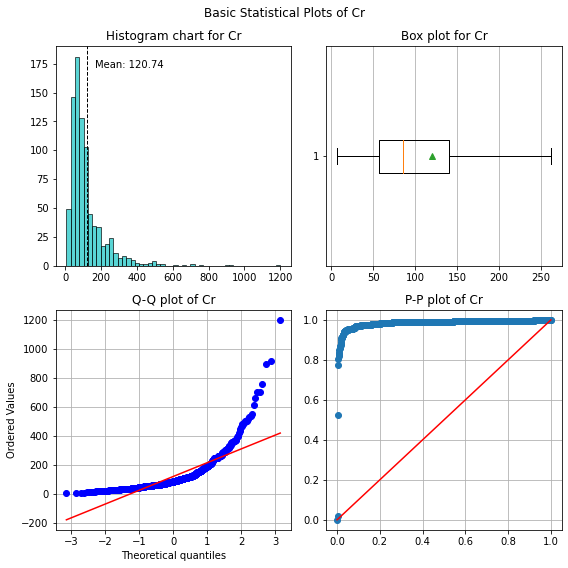

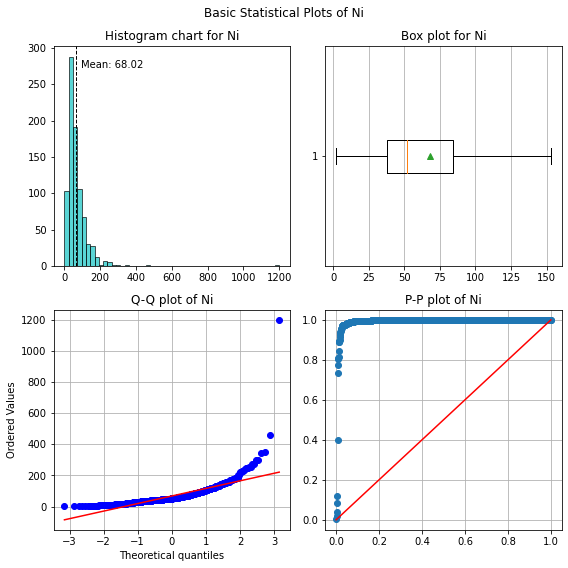

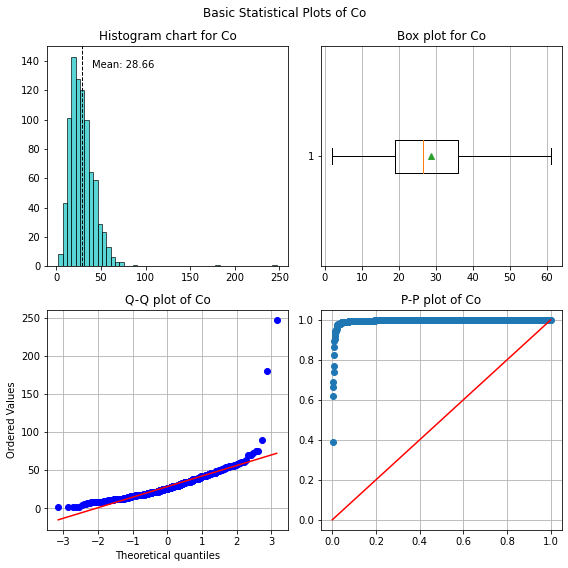

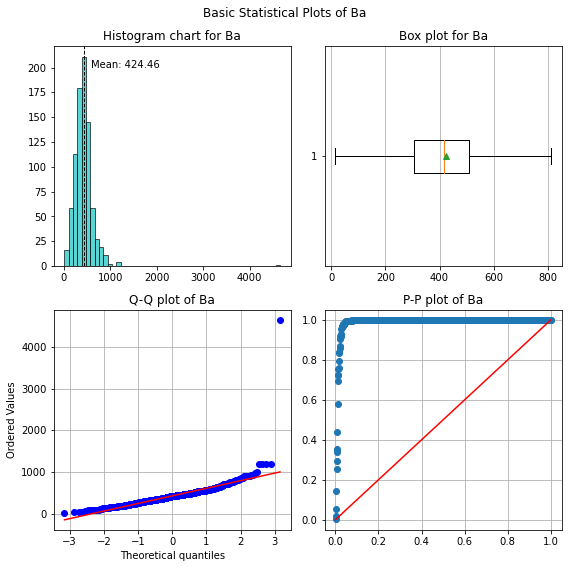

In [10]:
element_concentration = input_elements
for column in raw_data.loc[:, element_concentration.split()].columns:
    statistical_plots(raw_data,column)

## Part 2

<p style="color:red">SOME INFORMATION SHOULD BE ADDED HERE</p>

### 1. Gridding

Data visualization helps us to understand the given dataset. Element concentrations in the dataset are in a discritized form. If the current data base is mapped, the final result would be a scatter plot with some 800 points. That is not our goal. We're looking for a smooth image. In order to achieve that, element concentration needs to be interpolated. There are many different types of interpolation. In this research [`griddata`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) function is used from `scipy` library. This  has three different interpolation methods which the user can select; namely `cubic`, `nearest`, and `linear`. It's highly recommended to use the `cubic` method for the smoothest result as the entry for the `interpolation_method` argument of the following `gridding` function. However, for the ease of use, `linear` method is used in this research. Hopefully in the future the two other methods can be used without running into any errors. You can see the difference between the three different methods in the image below:

<img src="https://docs.scipy.org/doc/scipy/_images/scipy-interpolate-griddata-1.png" alt="nearest, linear, and cubic interpolation methods" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html" width=600px>

It's noteworthy to mention that in the `gridding` function, grid points are stacked along `axis = -1` since X and Y coordiantes needed to be paired with each other.
  

In [11]:
def gridding(raw_data, x_coordinates, y_coordinates, element_concenteration, interpolation_method, feature_range = (0.01, 0.99), fill_value=0):
    """
    column_x, column_y = returns X and Y values from the pandas dataframe
    column_z           = returns the value of element concentration from a desired column of the dataframe
    column_zs          = returns the standardized value of element concentration from a desired column of the dataframe
    x_axis, y_axis     = 1D np array that basically gives the start point and the endpoint of
                         each Cartesian axis with specific increments
    grid_points        = makes a rectangular 2D grid using x_axis and y_axis arrays
    grid               = this variable takes X and Y coordinates, takes Z values, points at which the interpolation
                         should be done, and the interpolation method and returns a grid of continuously interpolated data
    grids              = this variable takes X and Y coordinates, takes standardized Z values, points at which the interpolation
                         should be done, and the interpolation method and returns a grid of continuously interpolated data
    """

    column_x = raw_data.loc[:, f'{x_coordinates}'].values
    column_y = raw_data.loc[:, f'{y_coordinates}'].values
    column_z = raw_data.loc[:, f'{element_concenteration}'].values
    scaler = MinMaxScaler(feature_range=feature_range)
    column_zs = scaler.fit_transform(column_z.reshape(-1, 1)).reshape(raw_data.shape[0], )

    x_axis = np.linspace(min(column_x), max(column_x), 1000)
    y_axis = np.linspace(min(column_y), max(column_y), 1000)

    grid_points = np.meshgrid(x_axis, y_axis)
    grid_points = np.stack(grid_points, axis=-1)

    transposed_mat = np.array([column_x, column_y]).T
    grid = griddata(transposed_mat, np.array(column_z), grid_points, method=interpolation_method,
                    fill_value=fill_value)
    grids = griddata(transposed_mat, np.array(column_zs), grid_points, method=interpolation_method,
                     fill_value=fill_value)

    return grid, grids, column_x, column_y, column_z, column_zs


### 2. Mapping
There are many different ways to make this visualization graphically understandable. The matplotlib library that helps with plotting, provides the coloring. Here the `seismic` variant is used. However, the user can select the color spectrum of choice from matplotlib library [documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html). It is highly recommended to use `seismic`, `rainbow`, or `terrain` as enteries for the `cmap` argument of the following `mapping` function. 

In [40]:
def mapping(raw_data, element_concenteration, cmap, title):
    
    fig, ax = plt.subplots(3, 3, figsize = (36, 28))
    
    for counter, column in enumerate((raw_data.loc[:, element_concenteration.split()].columns)):
        x_index, y_index = int(counter/3), counter%3
        grid = gridding(raw_data, input_X, input_Y, element_concenteration = column, interpolation_method = input_interpol)[0]
        plot = ax[x_index, y_index].imshow(grid, origin='lower', cmap=plt.get_cmap(cmap))
        cbar = fig.colorbar(plot, ax = ax[x_index, y_index])
        cbar.set_label('',labelpad=+2)
        # ax[x_index, y_index].set_title(f"Interpolated map of {column}")
        ax[x_index, y_index].set_title(f"{title}{column}")

In [42]:
input_X = input(" Which column corresponds with X axis of the Catesian system?\n")
# X
input_Y = input("\n Which column corresponds with Y axis of the Catesian system?\n")
# Y
input_interpol = input("\n Which interpolation method should be used? cubic, linear, or nearest? Please write the desired one.\n")
# linear

 Which column corresponds with X axis of the Catesian system?
X

 Which column corresponds with Y axis of the Catesian system?
Y

 Which interpolation method should be used? cubic, linear, or nearest? Please write the desired one.
cubic


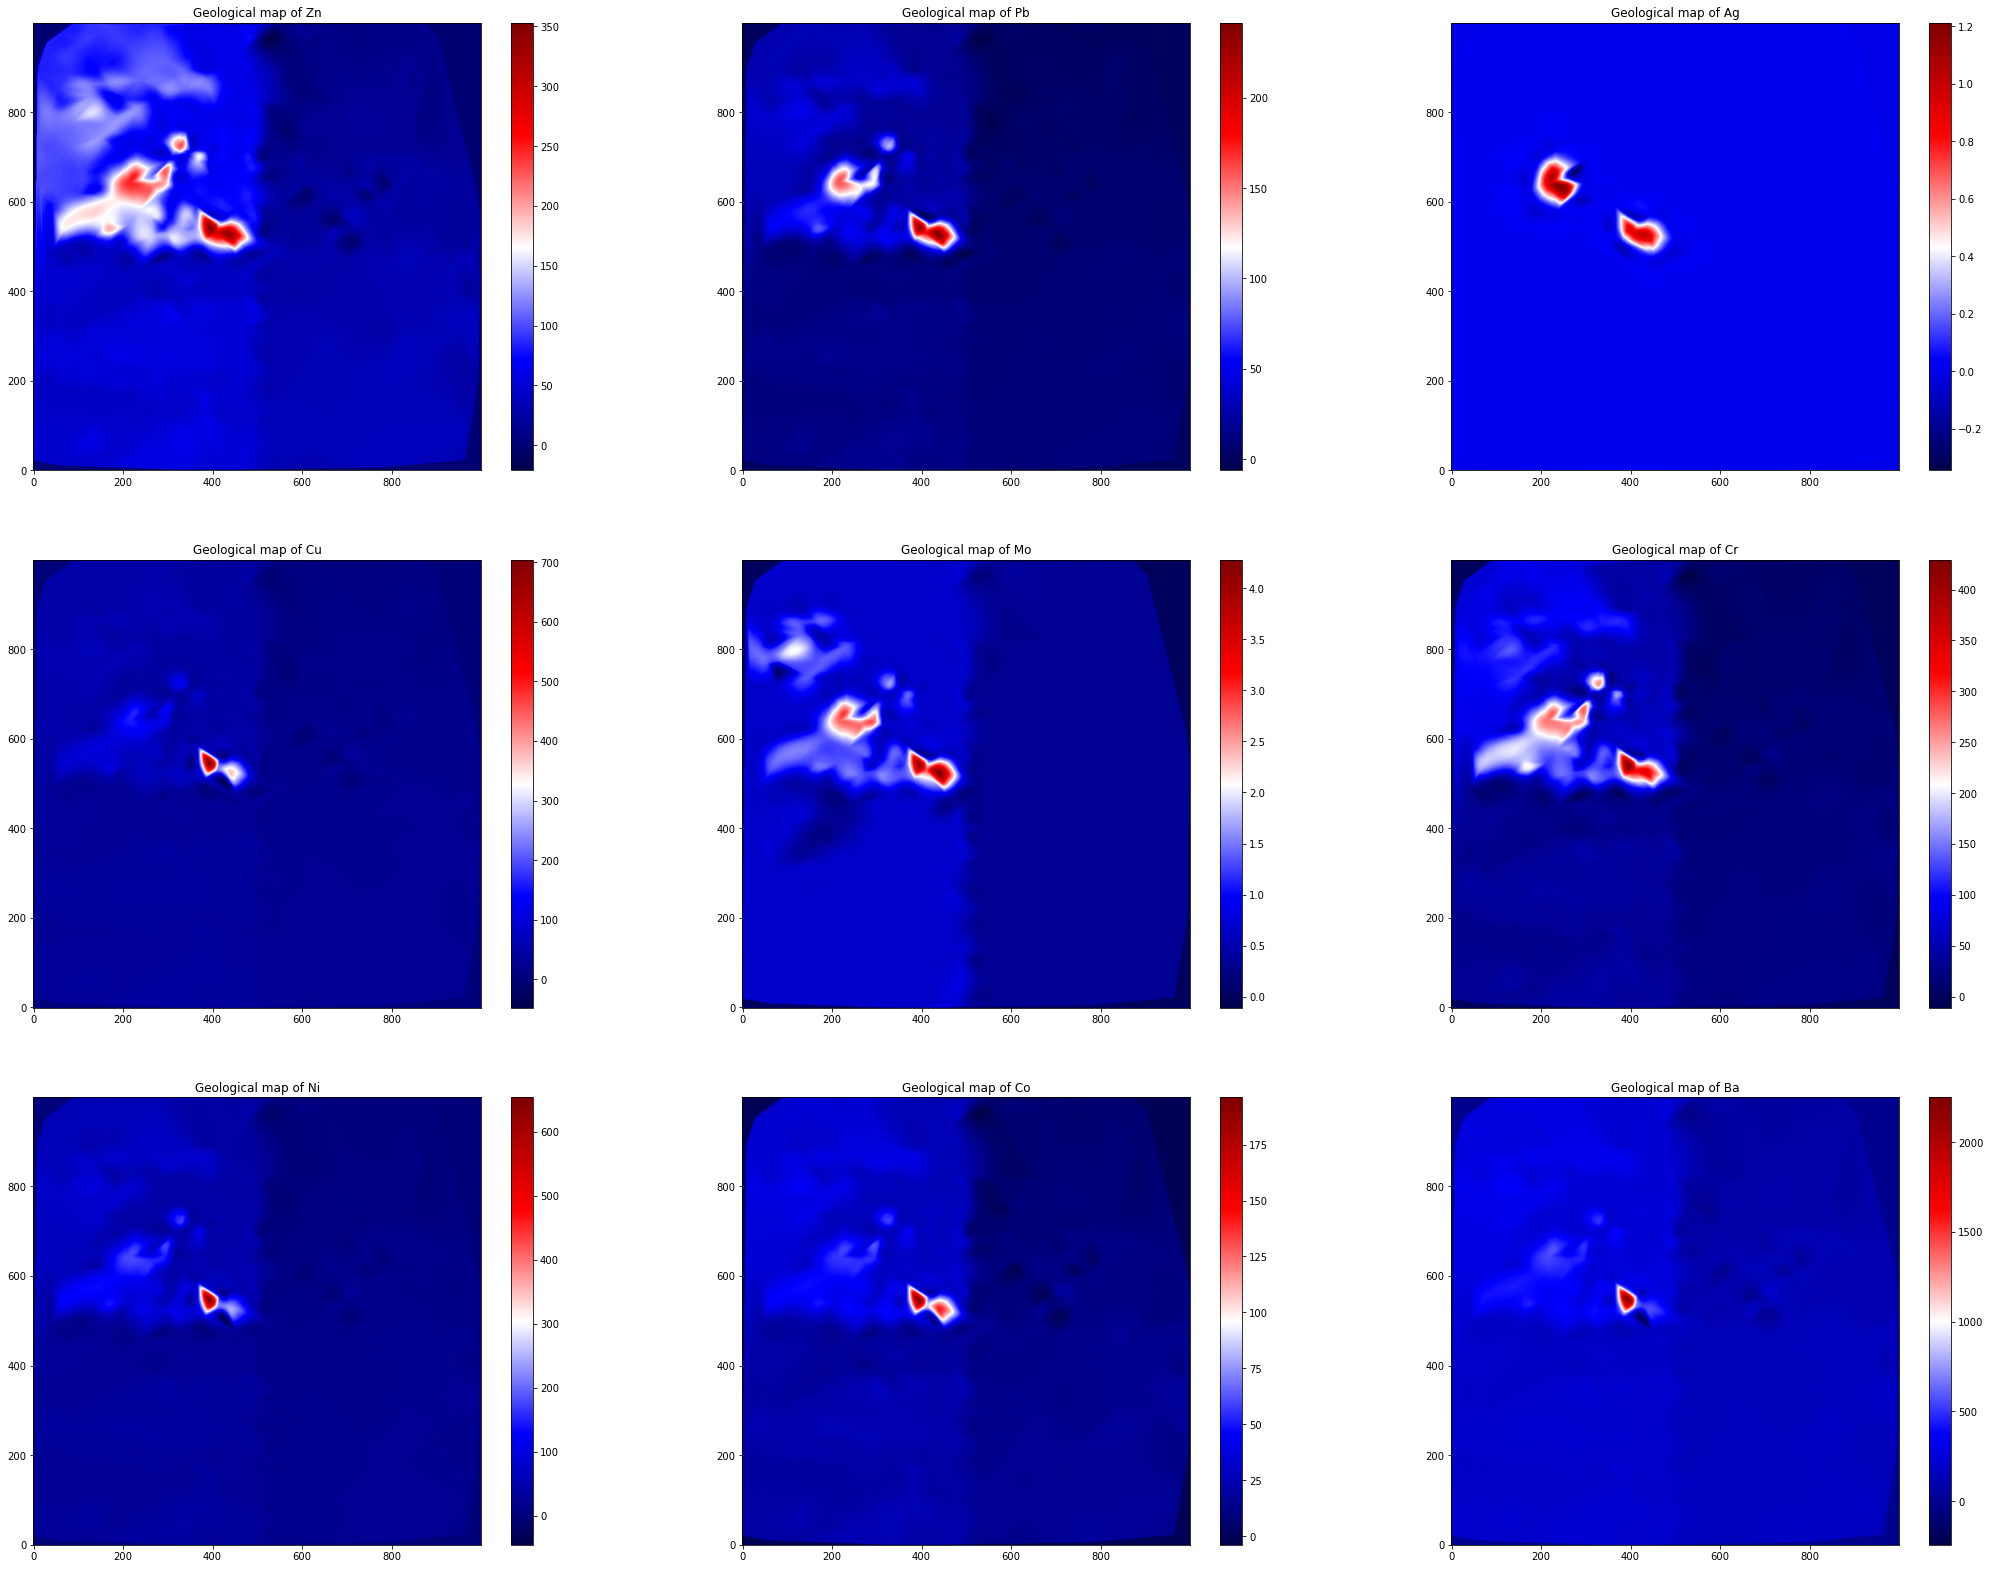

In [43]:
mapping(raw_data, input_elements, 'seismic', title="Geological map of ")

### 3. Principal Component Analysis

[Principal Component Analysis](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest. Since the importance of this tool is much higher than other statistical tools, it's been decided to assign a different section for it.

There can be infinite PCAs. Here we compute as many PCAs as the number of elements, which is 9 in this case. It's best to standardize the data before computing PCA. This was done in the `gridding` function and we just call it in here. The explained variance for each PCA is also calculated and termed as PCA Matrix.   


In [15]:
def pca(raw_data, element_concentration):
    
    splitted = element_concentration.split()
    ele = raw_data.loc[:, splitted].values
    ele = StandardScaler().fit_transform(ele)

    column_names_PCA = []
    for i in range(1, len(splitted) + 1):
        column_names_PCA.append(f"PCA{i}")

    pca = PCA(n_components=len(splitted))
    principalComponents = pca.fit_transform(ele)
    loadings1 = pd.DataFrame(np.round(pca.components_.T, 3), columns=column_names_PCA, index=splitted)

    
    column_names_PCA_matrix = []
    for i in range(1, len(splitted) + 1):
        column_names_PCA_matrix.append(f"PCAM{i}")

    loadings2 = pca.components_.T * np.sqrt(pca.explained_variance_)
    loadings_matrix = pd.DataFrame(np.round(loadings2, 3), columns=column_names_PCA_matrix, index=splitted)

    
    
    processed_df = pd.DataFrame()
    for i,element in enumerate(splitted):
        raw_data[element] = raw_data[element] * max(loadings1.loc[element,:])

    processed_df = processed_df.append(raw_data,False)

    
    return loadings1, processed_df, loadings_matrix


After calculating the PCA, it's very helpful to see which element correlates to the highest (or lowest) PCA; e.g. Zn correlates with PCA 8. Then the correlated PCA can be multiplied to the element column to give us a new map. This new map is called PCA map of that element.

 Here is the Principal Component Analysis for each element:

     PCA1   PCA2   PCA3   PCA4   PCA5   PCA6   PCA7   PCA8   PCA9
Zn  0.343 -0.211 -0.374  0.252 -0.237  0.087 -0.087 -0.589  0.465
Pb  0.351  0.132 -0.206  0.228  0.369  0.215  0.716  0.246  0.104
Ag  0.235  0.900  0.004  0.107 -0.318 -0.005 -0.148  0.003 -0.006
Cu  0.338  0.098  0.529 -0.097  0.554  0.086 -0.126 -0.495 -0.109
Mo  0.335  0.033 -0.389 -0.842  0.068 -0.138 -0.024  0.039  0.016
Cr  0.346 -0.135 -0.351  0.355  0.117 -0.329 -0.239  0.045 -0.657
Ni  0.351 -0.117  0.250  0.137  0.124 -0.400 -0.310  0.491  0.518
Co  0.347 -0.209  0.111 -0.044 -0.222  0.756 -0.283  0.311 -0.152
Ba  0.338 -0.205  0.433 -0.094 -0.562 -0.281  0.456 -0.080 -0.193

 And, here is the Principal Component Analysis Matrix of each element:

    PCAM1  PCAM2  PCAM3  PCAM4  PCAM5  PCAM6  PCAM7  PCAM8  PCAM9
Zn  0.956 -0.176 -0.211  0.083 -0.052  0.018 -0.007 -0.034  0.015
Pb  0.979  0.110 -0.116  0.075  0.081  0.045  0.056  0.014  0.003
Ag  0.65

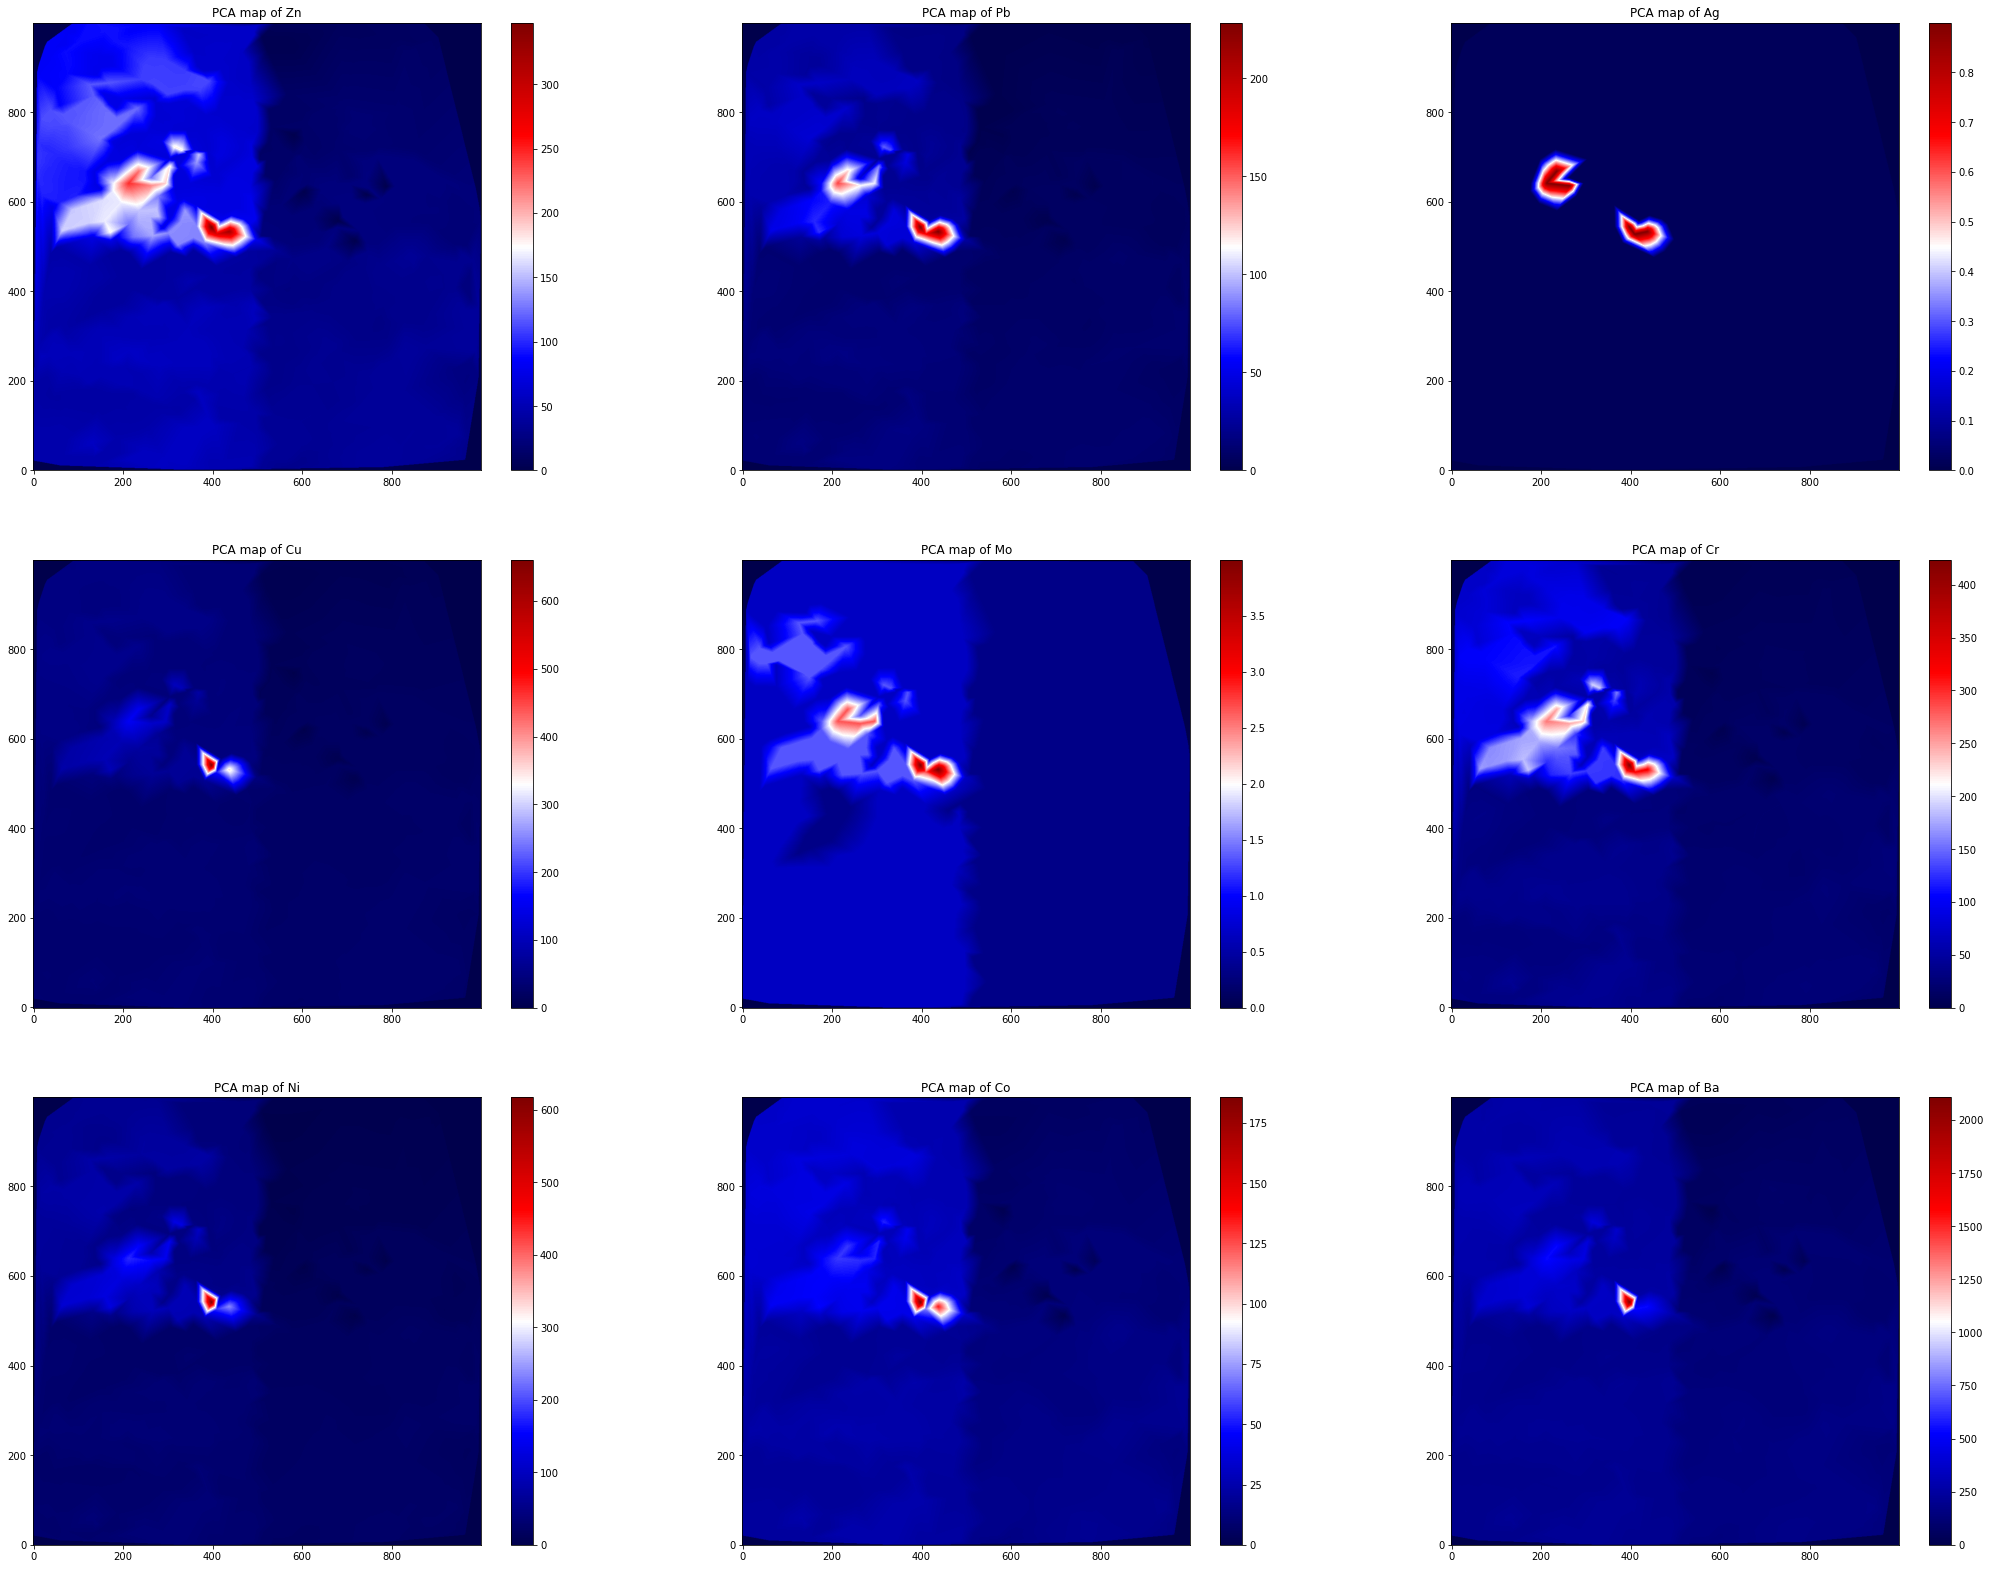

In [16]:
a, b, c = pca(raw_data,input_elements)

print(" Here is the Principal Component Analysis for each element:\n")
print(a)
print("\n And, here is the Principal Component Analysis Matrix of each element:\n")
print(c)
print("\n Finally, here is the PCA map of each element:\n")

mapping(b, input_elements, 'seismic', title="PCA map of ")

### 4. Drawing Concenteration-Area (C-A) Diagrams

In order to determine a data-driven threshold for different classes of an evidential layer, first there needs to draw a concenteration-area (C-A) diagram for each map.    

According to the literature in the article by Yousefi and Carranza, this logarithmic diagram consists of two axes. The values on the vertical axis corresponds with the logarithm of the area of the map. The horizontal axis correponds with the logarithmic values of the concentration of an element. Thus, each point in this diagram represents the area occupied within a specific threshold of concenteration; lower the concenteration, i.e. closer to zero, bigger the area occupied within that threshold.   

As said, in order to determin thresholds for the classes of the evidential layer, the C-A diagram is used. To draw this diagram the evidential map is divided into equal slices. Each slice holds the area within a specific range of concenteration values; e.g. the range of concenteration between 0.1 to 0.2 holds 20 percent of the area. In this research, the range of element concenteration is divided into `24` equal parts. Then the area within each slice is calculated.   

After plotting each datapoint into the diagram, some lines are fitted into these `24` points. The number of lines that fit these datapoints can vary. In this research `3` to `5` lines are fitted. Here `5` lines are fitted.

In [17]:
def best_fit(X, Y):
    
    """
    xbar     = arithmetic mean of X values
    ybar     = arithmetic mean of Y values
    n        = length of X
    numer    = numerator of least squares formula
    denum    = denominator of least squares formula
    b        = least squares formula that gives the slope of the desired line
    a        = the desired line made by slope b and attributes xbar and ybar
    """    
    n = len(X) 
    xbar = sum(X)/n

    m = len(Y)
    ybar = sum(Y)/m    

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2
    b = numer / denum
    a = ybar - b * xbar

    return a, b

In [18]:
def get_area(num_slice, element_concenteration, raw_data):

    """
    thr       = the range of slices of the Z column values
    slices    = the entire range of the Z column has been divided into several equal parts
    real_area = the area of the given grid
    areas     = the area of each slice
    X_values  = the values on the X axis of the c-a plot
    helper    = returns Z values for the given condition. The given condition is: slice values less than the next slice and more than the previous slice
    sub_area  = the area of a single slice
    """
    
    grid1,_,col_x, col_y, col_z,_=gridding(raw_data, input_X, input_Y, element_concenteration, interpolation_method = input_interpol, fill_value=0.1)

    thr = round((max(col_z)-min(col_z))/num_slice, 2)
    slices = [np.min(grid1)] + [np.min(grid1)+ i*thr for i in range(1,num_slice)] + [np.max(grid1)]
    real_area = (max(col_x)-min(col_x))*(max(col_y)-min(col_y))

    areas = []
    X_values = []

    for i, value in enumerate(slices):
        try:
            if i != 0:
                helper = np.where((grid1 < slices[i+1])&(grid1>=value))
                sub_area = helper[0].shape[0]
                sub_area = round(sub_area*real_area/1000000,2)
                if np.mean(grid1[helper[0], helper[1]]) > 0.1:
                    if sub_area > areas[-1]:
                        del areas[-1]
                        X_values.append(np.mean(grid1[helper[0], helper[1]]))
                        areas.append(sub_area)
                    else:
                        X_values.append(np.mean(grid1[helper[0], helper[1]]))
                        areas.append(sub_area)

            else:
                helper = np.where(grid1 < slices[i+1])
                sub_area = helper[0].shape[0]
                sub_area = round(sub_area*real_area/1000000,2)
                X_values.append(np.mean(grid1[helper[0], helper[1]]))
                areas.append(sub_area)

        except:
            ar = []
            xv = []
            for i in range(len(areas)):
                if X_values[i] > 0.1:
                    ar.append(areas[i])
                    xv.append(X_values[i])
            return ar[-20:], xv[-20:]



In [24]:
def ca_data(raw_data, element_concenteration, num_points):
    
    column = raw_data.loc[:, f'{element_concenteration}'].values
    lines = []
   
    areas, X_values = get_area(24, element_concenteration, raw_data)
    X = []
    Y = []
    for i, area in enumerate(areas):
        X.append(np.log10(X_values[i]))
        Y.append(np.log10(area))
    
    points = [np.array_split(np.array(X), num_points), np.array_split(np.array(Y), num_points)]
       
    return lines, points, X, Y
    

In [22]:
def ca_diagram(raw_data, element_concenteration, num_points):

    fig, ax = plt.subplots(3, 3, figsize = (36, 28))
    
    for counter, column in enumerate((raw_data.loc[:, element_concenteration.split()].columns)):
        lines, points, X, Y = ca_data(raw_data, element_concenteration = column, num_points = 5)
        
        for i in range(num_points):
            x = list(points[0][i])
            y = list(points[1][i])
            a,b = best_fit(x, y)
            lines += [[a,b]]
      
            if i != 0:
                x = list(points[0][i-1])[:] + x

            try:
                x =  x + list(points[0][i+1])[:]
            except:
                pass

            y = [a + b*xi for xi in x]
            ax[int(counter/3), counter%3].plot(x, y, 'r')
            
        ax[int(counter/3), counter%3].scatter(X, Y)
        ax[int(counter/3), counter%3].set_title(f"C-A diagram of {column}")
        ax[int(counter/3), counter%3].set_xlabel(f"Log Transformed Value of {column}")
        ax[int(counter/3), counter%3].set_ylabel(f"Log(Area) of {column}")
        ax[int(counter/3), counter%3].grid()
        plt.show
    

/Users/yasin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/yasin/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


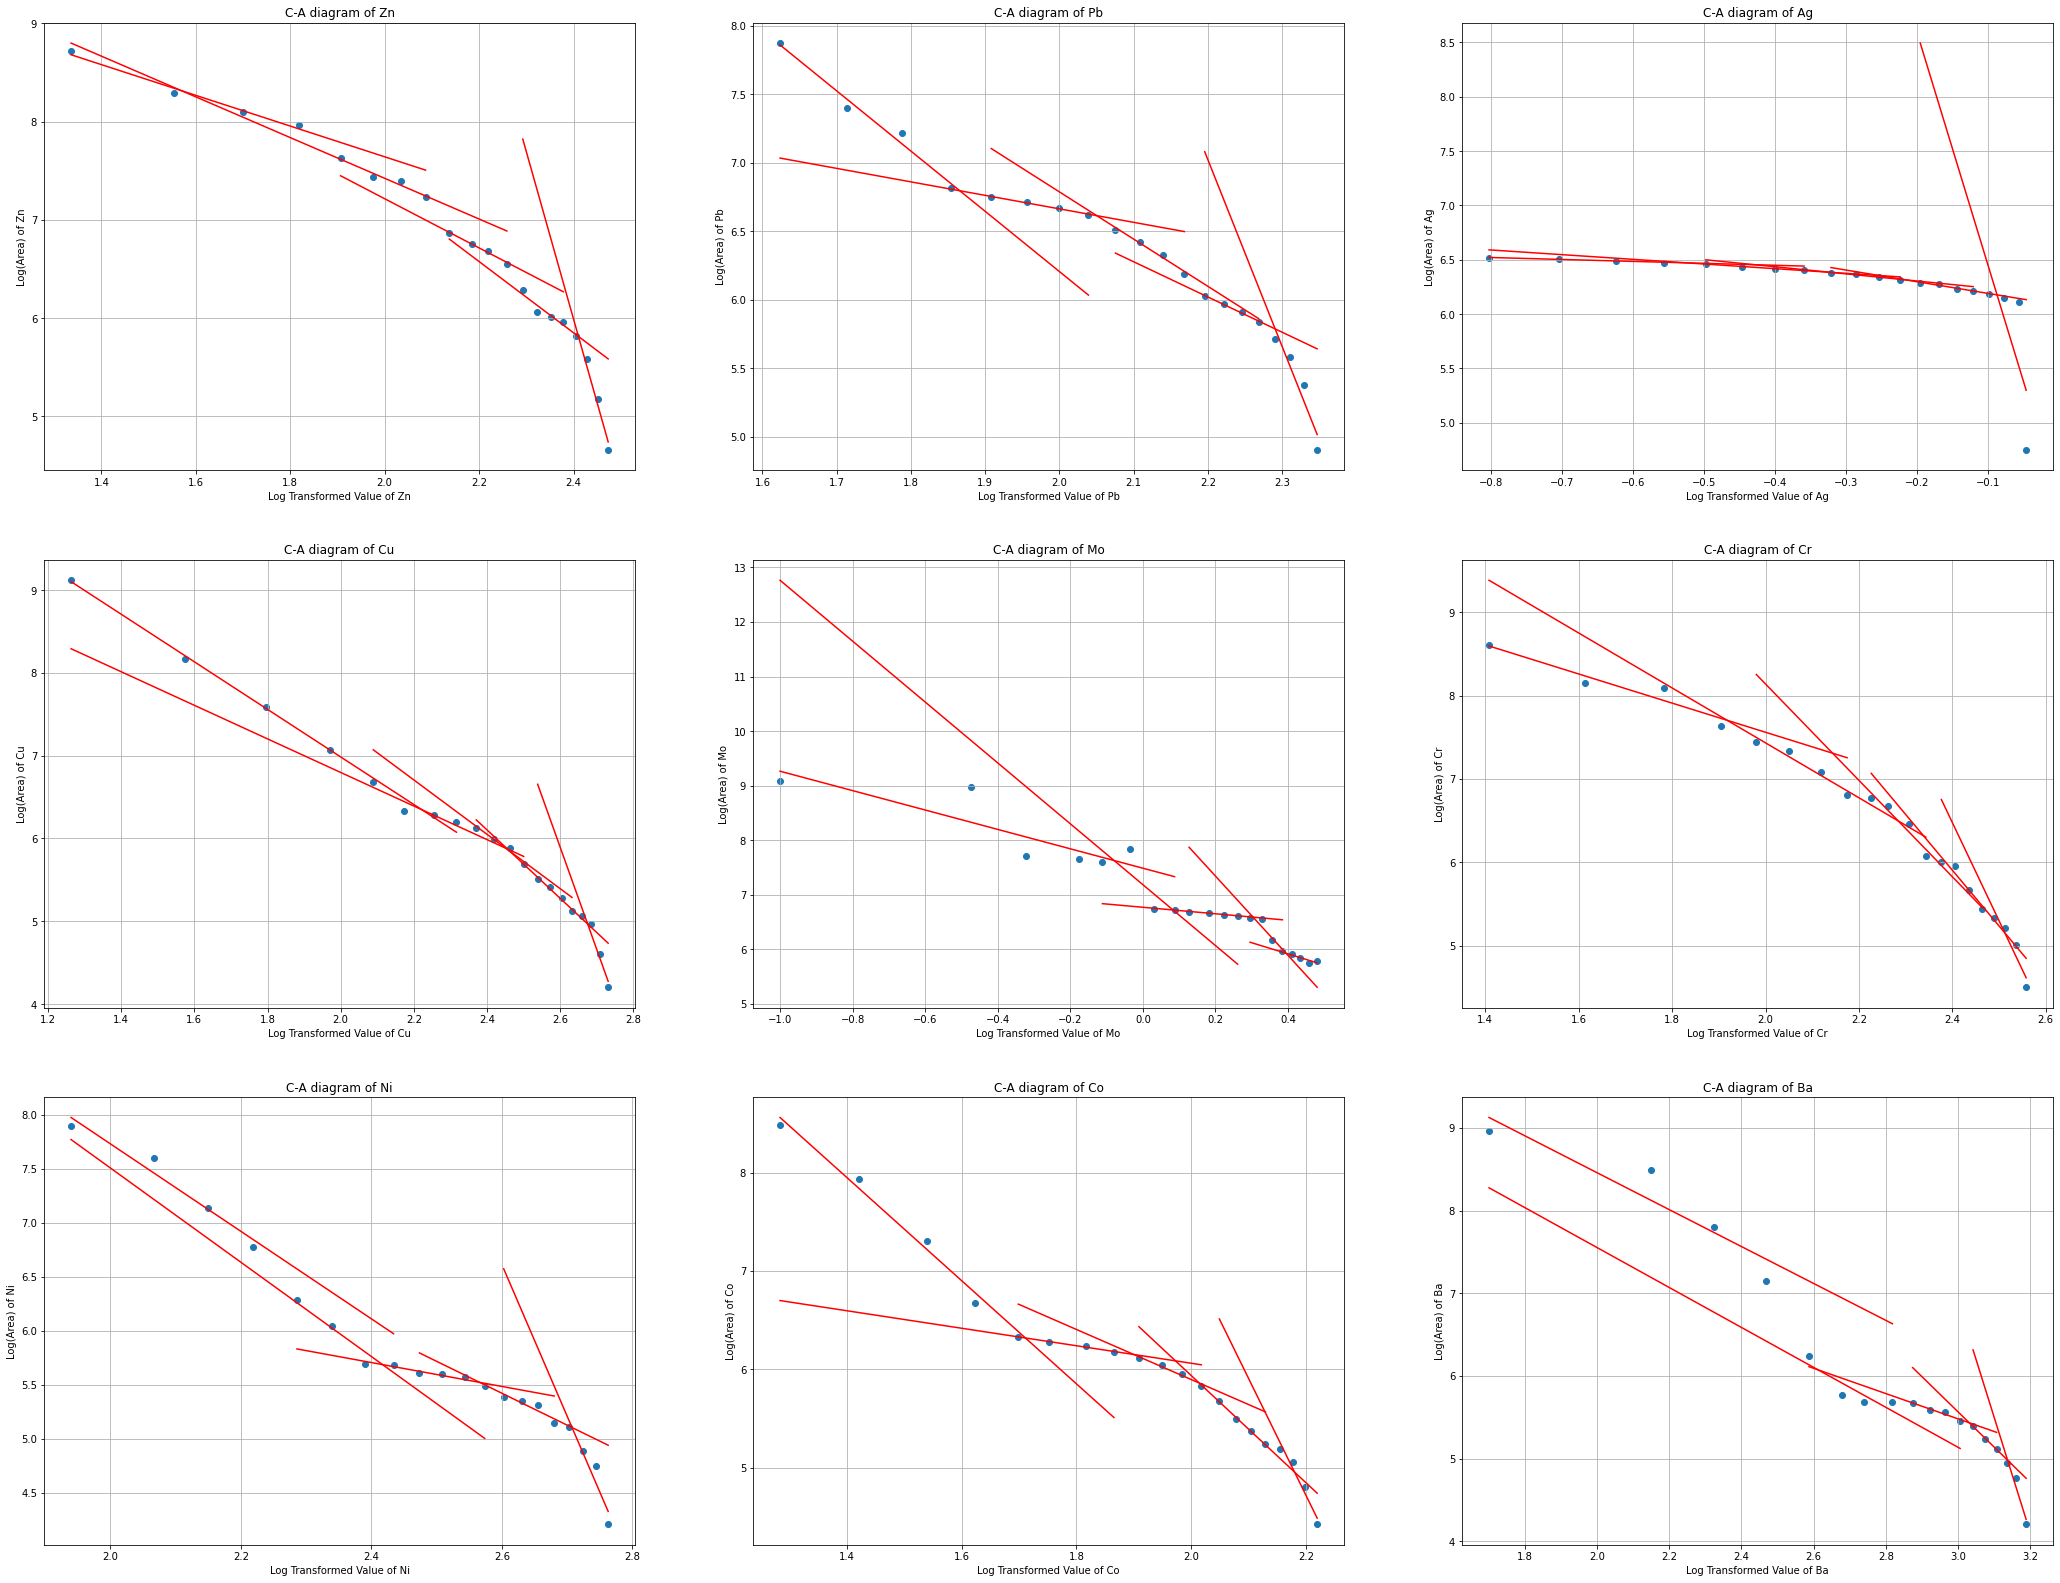

In [25]:
ca_diagram(raw_data, input_elements, 5)

### 5. Determining Threseholds for Classes of Evidential Map

After drawing the diagram, there's only one step left towards finding thresholds for each class of the evidential layer. The linear lines drawn in each diagram has intercetion points. The value of these intersection points on the X axis, i.e. logarithmic values of element concenteration, is found. Since these values are logarithmic, the inverse logarithm of these values are calculated.  

Now, these values can be used as threshold range for each class of the evidential map. A new evidential map is drawn based on these new thresholds.   

Since known mineral occurences in this area is used for the next step, they are scatter-plotted in the new evidential map in here.

In [26]:
def discrete_mapping(element_concenteration, raw_data, interpolation_method, slices, known_mineral, ax, counter, fig):


    grid2,_,col_x2, col_y2, col_z2,_=gridding(raw_data, input_X, input_Y, element_concenteration, interpolation_method = input_interpol, fill_value=0.1)
    
    cmap = mpl.colors.ListedColormap(['green', 'cyan', 'yellow', 'orange','blue', 'linen','saddlebrown','salmon','darkkhaki'][:len(slices)-1])
    bounds = slices
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N, clip=True)


    known_mineral_x = []
    known_mineral_y = []
    for index, row in known_mineral.iterrows():
        x = int(row['XUTM'])
        x = int((x - min(col_x2)) * (1000) / (max(col_x2) - min(col_x2)))

        y = int(row['YUTM'])
        y = int((y - min(col_y2)) * (1000) / (max(col_y2) - min(col_y2)))

        known_mineral_x.append(x)
        known_mineral_y.append(y)


    ax[int(counter/3), counter%3].imshow(grid2,  origin='lower', cmap=cmap)
    ax[int(counter/3), counter%3].scatter(known_mineral_x, known_mineral_y, c = 'black', marker = '^')
    cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),extendfrac='auto',ticks=bounds,spacing='uniform', ax = ax[int(counter/3), counter%3])
    cbar.set_label('',labelpad=+2)

    ax[int(counter/3), counter%3].set_title(f"Discretized map of {element_concenteration}")


In [34]:
def discrete_mapping_iterated(raw_data,known_mineral,element_concenteration):
    
    fig, ax = plt.subplots(3, 3, figsize = (36, 28))
    
    for counter, column in enumerate((raw_data.loc[:, element_concenteration.split()].columns)):
        
        raw_data[column] = gridding(raw_data, input_X, input_Y, element_concenteration = column, interpolation_method = input_interpol, feature_range=(0.1, .99))[4]
        slices = [0.1]
        lines[column] = ca_data(raw_data, element_concenteration = column, num_points = 5)[0]
        for i,line in enumerate(lines[column]):
            try:
                a = np.array([[-1*line[1],1], [-1*lines[column][i+1][1],1]])
                b = np.array([line[0],lines[column][i+1][0]])
                x = np.linalg.solve(a, b)
                if 10 ** x[0] > slices[-1] and 10 ** x[0] >= 0.1 and 10 ** x[0] <= 1.1:
                    slices.append(10 ** x[0])
            except:
                pass

        slices.append(1.1)
        discrete_mapping(column, raw_data, input_interpol, slices, known_mineral, ax, counter, fig)


NameError: name 'lines' is not defined

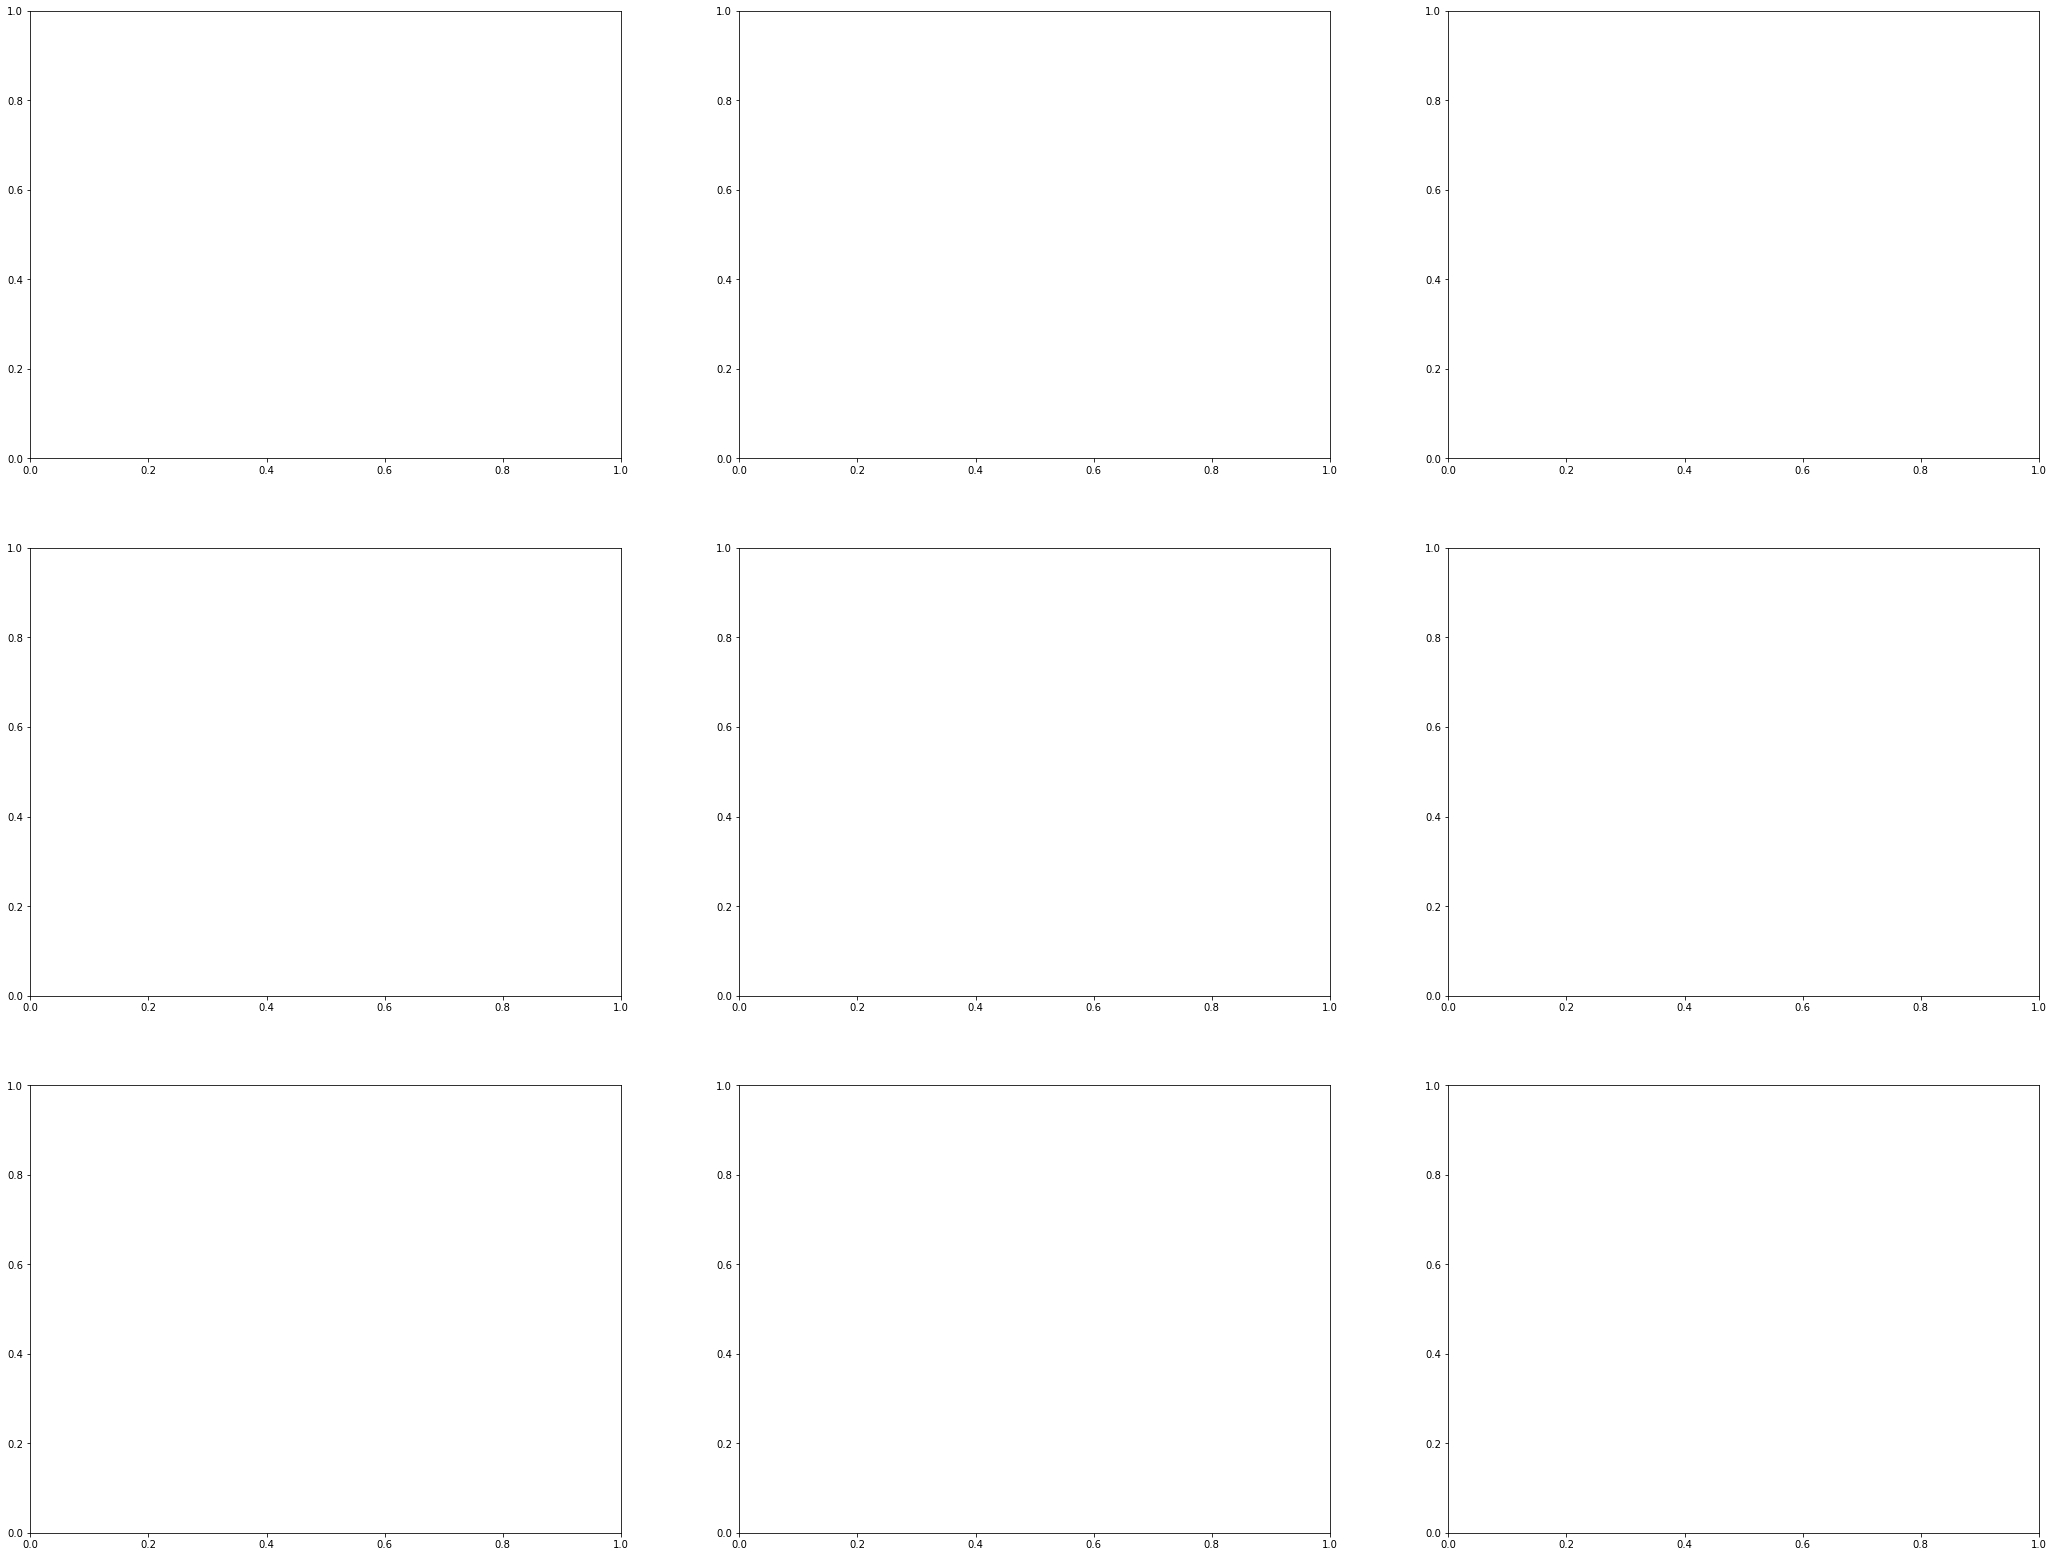

In [35]:
known_mineral = pd.read_excel('/Users/yasin/Desktop/Thesis - Programming/Known_mineral_deposits-970729.xls')[['XUTM', 'YUTM']]

discrete_mapping_iterated (raw_data,known_mineral,input_elements)